<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Ignacio Negrete
- Nombre de alumno 2: Camila Salas


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ignacio3645/MDS7202.git)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

In [3]:
# Exploracion de los datos
# Se observa informacion importante sobre los datos
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Total de valores unicos
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [5]:
# Se muestran los valores unicos de cada columna
for col in df.columns:
  print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Age': [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Unique values in 'Sex': [1. 0.]
Unique values in 'HighChol': [0. 1.]
Unique values in 'CholCheck': [1. 0.]
Unique values in 'BMI': [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Unique values in 'Smoker': [0. 1.]
Unique values in 'HeartDiseaseorAttack': [0. 1.]
Unique values in 'PhysActivity': [1. 0.]
Unique values in 'Fruits': [0. 1.]
Unique values in 'Veggies': [1. 0.]
Unique values in 'HvyAlcoholConsump': [0. 1.]
Unique values in 'GenHlth': [3. 1. 2. 4. 5.]
Unique values in 'MentHlth': [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
Unique values in 'Phys

In [ ]:
# Se observa la distribución de las distintas variables
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_n = df.drop(columns=['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'] )
columns = df_n.columns
fig = make_subplots(rows=1, cols=5, subplot_titles=columns)

# Se agregan las distribuciones
for i in range(len(columns)):
    fig.add_trace(go.Histogram(x=df_n[columns[i]]), row=1, col=i+1)

fig.update_layout(height=500, width=1500, title_text="Distribución de variables numéricas")
    
fig.show()

* Debido a que las columnas categóricas son valores 0 o 1, no se realizará una transformación, en cambio a las numéricas, se les aplicará MinMaxScaler, ya que se observa que se tienen rangos de valoresdiferentes y tampoco se presenta un comportamiento normal para todas las columnas numéricas.

In [7]:
from sklearn.model_selection import train_test_split

# Se divide el dataset en entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Diabetes'), df['Diabetes'], test_size=0.33, random_state=42)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Se definen columnas categoricas
col_categoricas = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP'] 

# Se definen columnas numericas
col_numericas = X_train.columns.drop(col_categoricas).to_list()

# se define la transformacion a las variables numericas
trans_numericas = Pipeline([('minmax', MinMaxScaler())])

# se define el column transformer
column_transformer = ColumnTransformer([('numericas', trans_numericas, col_numericas),
                                        ('categoricas', 'passthrough', col_categoricas)],
                                        verbose_feature_names_out = False)

column_transformer.set_output(transform='pandas')

ColumnTransformer(transformers=[('numericas',
                                 Pipeline(steps=[('minmax', MinMaxScaler())]),
                                 ['Age', 'BMI', 'GenHlth', 'MentHlth',
                                  'PhysHlth']),
                                ('categoricas', 'passthrough',
                                 ['Sex', 'HighChol', 'CholCheck', 'Smoker',
                                  'HeartDiseaseorAttack', 'PhysActivity',
                                  'Fruits', 'Veggies', 'HvyAlcoholConsump',
                                  'DiffWalk', 'Stroke', 'HighBP'])],
                  verbose_feature_names_out=False)

In [9]:
# Se crea el pipeline donse se aplica column tranform y xgboost
import xgboost as xgb

pipeline_xgb = Pipeline([('columntransformer', column_transformer),
                     ('xgboost', xgb.XGBClassifier())])

pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'BMI', 'GenHlth',
                                                   'MentHlth', 'PhysHlth']),
                                                 ('categoricas', 'passthrough',
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'DiffWalk', 'Stroke',
                                                   'HighBP'])],...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [10]:
from sklearn.metrics import classification_report

# Se obtiene el clasification_report
y_pred = pipeline_xgb.predict(X_test)

print('Reporte de desempeño del modelo xgbost: ')
print(classification_report(y_test, y_pred))

Reporte de desempeño del modelo xgbost: 
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11651
         1.0       0.73      0.79      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



* Si se observan los valores en las métricas obtenidas, se puede notar que en general es un buen modelo, ya que en todos los casos sus métricas superan el 0.7 y en algunos casos están cerca de llegar a 0.8. Ahora, esto es mejorable y considerando lo delicado que es detectar diabetes en las personas, con los problemas que conlleva, es necesario considerar la cantidad de falsos negativos que se están prediciendo.

**Respuestas 2.2:** 

* ¿Es acaso un buen predictor de diabetes? 

    Al observar los valores obtenidos en las métricas se puede notar que tiene un alto desempeño con todas por sobre el 0.7. Por lo anterior, podría considerarse como un buen predictor, pero no el mejor, ya que puede mejorar bastante y al ser un tema relacionado con la salud y considerando los efectos de no considerar un paciente con diabetes, es necesario tener en consideración estos casos.

* ¿Qué buscan explicar las métricas utilizadas? 
    Las métricas utilizadas en classification report buscan explicar la cantidad de predicciones orientadas a cierto escenario, donde precision al no ser 1 indica que hay valores detectados falsamente como positivos, recall muestra que hay cierta cantidad de falsos negativos, f1-score muestra un desempeño considerando el comportamiento de las últimas dos métricas mencionadas y accuracy muestra las clasificaciones correctas sobre el total de predicciones.

* ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

    Las métricas utilizadas no pueden asegurar que se realice una buena elección de features, ya que sabiendo que hay un rango de mejora, puede existir una mejor elección, como también puede ser una buena elección y no poder mejorar más.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

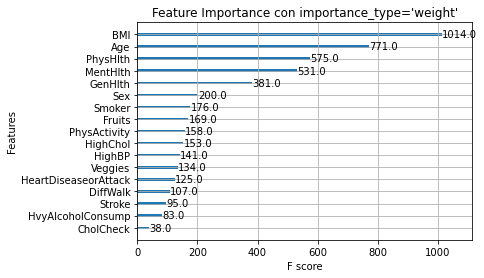

In [11]:
import matplotlib.pyplot as plt

# Se grafican las importancias segun weight
xgb.plot_importance(pipeline_xgb.named_steps['xgboost'], importance_type= 'weight')
plt.title("Feature Importance con importance_type='weight'")
plt.show()

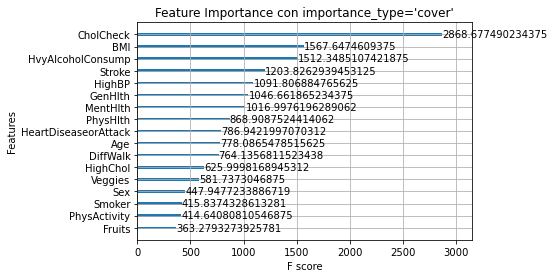

In [12]:
# Se grafican las importancias segun cover
xgb.plot_importance(pipeline_xgb.named_steps['xgboost'], importance_type= 'cover')
plt.title("Feature Importance con importance_type='cover'")
plt.show()

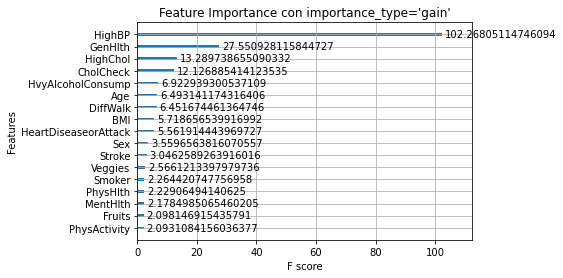

In [13]:
# Se grafican las importancias segun gain
xgb.plot_importance(pipeline_xgb.named_steps['xgboost'], importance_type= 'gain')
plt.title("Feature Importance con importance_type='gain'")
plt.show()

**Respuesta 3.2:** los resultados obtenidos de la importancia de las features no son compatibles, ya que solo falta notar las diferencias en la importancia que se les da a cada una. Por ejemplo, para weight la más importante es la columna BMI, pero en el segundo gráfico pasa a ser la segunda y en el tercero la séptima, lo que puede generar variaciones en los resultados de la predicción de este modelo. 

La desigualdad en la importancia de las features se debe a la forma en que se está obteniendo esta importancia, pudiendo notar que son distintos entre si.

**Respuesta 3.3:**¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [14]:
order = pipeline_xgb.named_steps['xgboost'].get_booster().feature_names
order

['Age',
 'BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP']

In [15]:
# Se implementa un metodo de permutacion para observar la importancia de features
from sklearn.inspection import permutation_importance
result = permutation_importance(pipeline_xgb.named_steps['xgboost'], X_test[order], y_test, n_repeats=10, random_state=42)
result

{'importances_mean': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.85785932e-04,
         4.28651035e-04, -3.21488276e-04,  5.10094732e-04,  9.00167174e-04,
         2.91482704e-04,  2.57190621e-05,  1.88606455e-04, -4.02931973e-04,
         1.58600883e-04,  3.60066870e-04,  9.00167174e-05, -3.42920828e-05,
         9.90183891e-04]),
 'importances_std': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.91698571e-04,
        2.33211377e-04, 2.08458424e-04, 2.40541607e-04, 1.53358857e-04,
        1.54314373e-04, 1.34462576e-04, 1.53598293e-04, 1.87041230e-04,
        1.36967254e-04, 8.39981051e-05, 1.45299424e-04, 5.35384971e-05,
        3.06388054e-04]),
 'importances': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000

In [16]:
# Se repite 3o veces el proceso
result30 = permutation_importance(pipeline_xgb.named_steps['xgboost'], X_test[order], y_test, n_repeats=30, random_state=42)
result30

{'importances_mean': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.90053867e-04,
         4.28651035e-04, -2.14325518e-04,  4.75802649e-04,  8.43013703e-04,
         2.68621315e-04,  5.71534714e-06,  9.85897381e-05, -3.55780359e-04,
         1.04305085e-04,  4.07218483e-04,  1.12878106e-04, -4.85804507e-05,
         9.73037850e-04]),
 'importances_std': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.84762464e-04,
        1.92017802e-04, 2.20800363e-04, 1.98402618e-04, 2.27180555e-04,
        1.55710435e-04, 1.22613845e-04, 1.44369092e-04, 2.03823455e-04,
        1.49591774e-04, 1.15417823e-04, 1.61711250e-04, 6.97647027e-05,
        2.48506718e-04]),
 'importances': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
 

**Respuesta 4.2:** si se observan los valores de desviación estándar ... e indica que ...

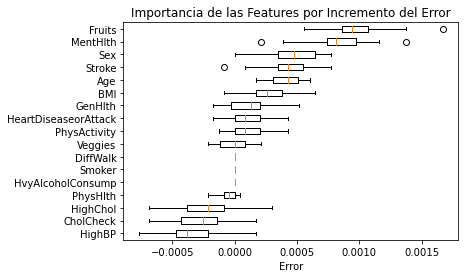

In [17]:
import numpy as np
# Se visualiza en un grafico
perm_sorted_idx = result30.importances_mean.argsort()

new_order = []
for i in range(perm_sorted_idx.shape[0]-1, -1, -1):
    new_order = np.append(new_order, order[perm_sorted_idx[i]])

plt.boxplot(
    result30.importances[perm_sorted_idx].T,
    vert=False,
    labels = new_order
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

In [18]:
order

['Age',
 'BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP']

In [19]:
perm_sorted_idx

array([11,  3,  5, 15,  0,  1,  2,  9, 10, 12, 14,  8, 13,  4,  6,  7, 16],
      dtype=int64)

**Respuestas 4.4:**
* ¿Cómo mide la importancia de las features su propuesta? (1 punto)
* ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
* ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
* Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [20]:
!pip install shap

In [21]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [22]:
X = df.drop(columns='Diabetes')
X_transform = column_transformer.fit_transform(X)

In [23]:
# Se calculan los shap values
import shap

# Se transforma X_test para utilizar en explainer, ya que explainer solo acepta el modelo xgboost
explainer = shap.TreeExplainer(pipeline_xgb.named_steps['xgboost'])
shap_values = explainer(X_transform)

shap_values.values[:]

array([[-1.0243229 , -0.21640405,  0.18997322, ..., -0.07237907,
        -0.02104545,  0.5106209 ],
       [ 0.26447377, -0.26442614,  0.10922176, ..., -0.05285726,
         0.12240041,  0.42154548],
       [ 1.0838264 , -0.23667654, -0.8139878 , ..., -0.08359638,
        -0.02439885, -0.46605775],
       ...,
       [-0.17399704, -0.3570402 ,  0.81029916, ...,  0.27442586,
        -0.02233883,  0.45987895],
       [ 0.36248368, -0.6302673 ,  0.79127455, ...,  0.29843086,
        -0.02894292,  0.55217236],
       [ 0.16201337, -0.4042964 , -0.6572694 , ..., -0.13536008,
        -0.03352158,  0.4830288 ]], dtype=float32)

**Respuesta 5.1.2:**  estos valores representan los shap values obtenidos para cada una de las muestras y sus respectivos atributos.

**Respuesta 5.1.3:** Cuando estos valores son positivos, significa que aportan de manera signitificativa al modelo, por el contrario, si son negativos, entonces el aporte es opuesto.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [24]:
# Se grafica el aporte local de las diferentes instancias
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                X_transform.iloc[idx,:],
                link="logit")

In [25]:
# Se grafica el aporte local de las diferentes instancias
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                X_transform.iloc[idx,:],
                link="logit")

In [26]:
# Se grafica el aporte local de las diferentes instancias
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                X_transform.iloc[idx,:],
                link="logit")

**Respuesta 5.2.2:** (cambiar respuestas)
  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? si se observan los gráficos en las distintas instancias, las variables que se ven en rojo son las que afectan de manera positiva a la posibilidad de poseer diabetes, como por ejemplo, la edad, en cambio, las variables que se ven de color azul son las que afectan de manera negativa, como por ejemplo HighBP.

  - ¿Existe algún patrón común entre las instancias analizadas? al analizar las distintas instancias, se puede notar que hay variables que se repiten en la afectación positiva o negativa.

  - ¿Es posible generalizar estas conclusiones a todo el dataset? en este caso, tal como se vio, incluso algunas variables afectan de manera postiva o negativa dependiendo de la instancia, por lo que no se podría generalizar, pero si entender más en detalle como se ven afectadas las predicciones.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

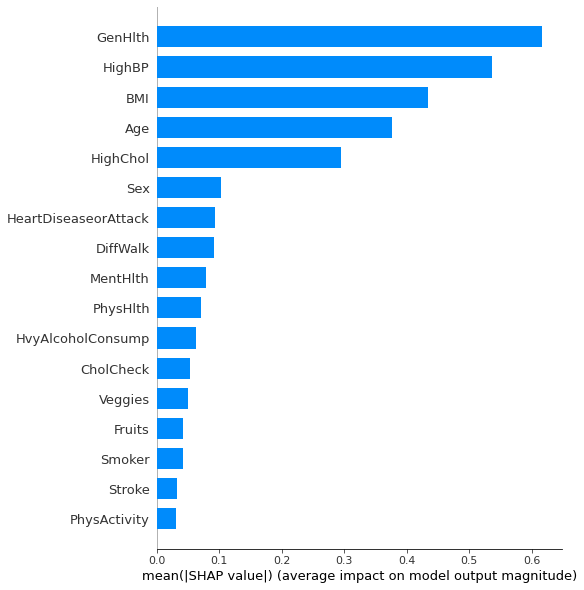

In [27]:
# Se visualiza la interpretabilidas global 
shap.summary_plot(shap_values, X_transform, plot_type="bar")

**Respuesta 5.3:** (cambiar respuesta) si se observa el gráfico, se puede ver que gran parte de las features no genera un gran aporte si se compara con las primeras variables. Ahora, si se compara con lo visto en las instancias, se puede notar la diferencia en las features que se consideran más relevantes en la predicción, ya que hay variables que en una instancia se consideran más relevantes, más no en el gráfico global.

De todas formas, si hay columnas que mantienen una alta importancia en concordancia entre las instancias y la mirada global.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [28]:
# Se grafica un scatter plot con cada feature
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]
feature_importance_names

Index(['HighChol', 'HighBP', 'Sex', 'Age', 'HeartDiseaseorAttack', 'Smoker',
       'Veggies', 'DiffWalk', 'CholCheck', 'BMI', 'PhysHlth', 'PhysActivity',
       'MentHlth', 'GenHlth', 'Fruits', 'Stroke', 'HvyAlcoholConsump'],
      dtype='object')

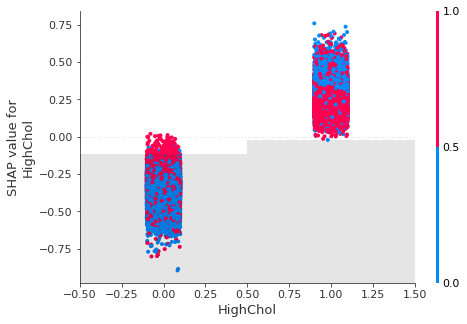

In [29]:
color = pipeline_xgb.predict(X)

# Primera feature
shap.plots.scatter(shap_values[:,feature_importance_names[0]], 
                       color=color, # color por etiqueta predicha
                       xmin=0) # se agrega valor minimo = 0 para tener una mejor visualización

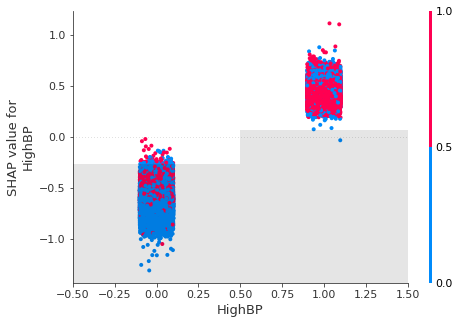

In [30]:
# Segunda feature
shap.plots.scatter(shap_values[:,feature_importance_names[1]], 
                       color=color, # color por etiqueta predicha
                       xmin=0) # se agrega valor minimo = 0 para tener una mejor visualización

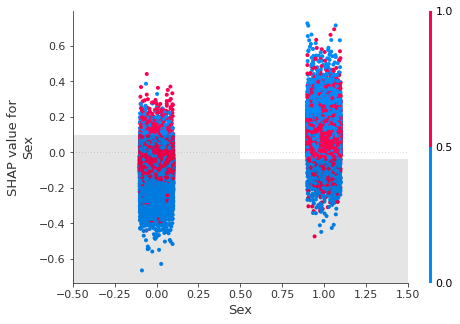

In [31]:
# Tercera feature
shap.plots.scatter(shap_values[:,feature_importance_names[2]], 
                       color=color, # color por etiqueta predicha
                       xmin=0) # se agrega valor minimo = 0 para tener una mejor visualización

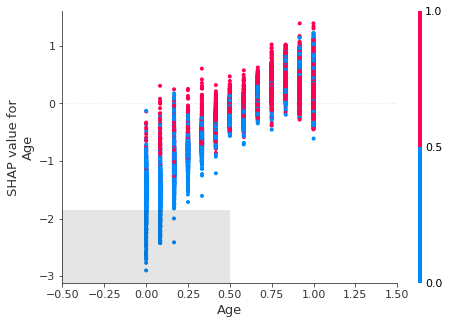

In [32]:
# Cuarta feature
shap.plots.scatter(shap_values[:,feature_importance_names[3]], 
                       color=color, # color por etiqueta predicha
                       xmin=0) # se agrega valor minimo = 0 para tener una mejor visualización

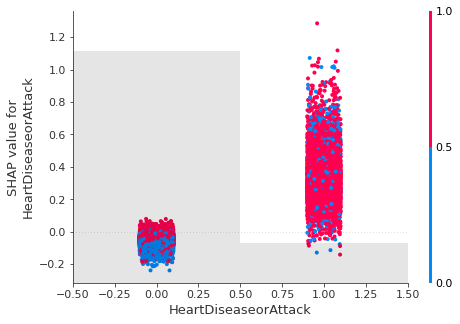

In [33]:
# Quinta feature
shap.plots.scatter(shap_values[:,feature_importance_names[4]], 
                       color=color, # color por etiqueta predicha
                       xmin=0) # se agrega valor minimo = 0 para tener una mejor visualización

**Respuesta 5.4:** 

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [ ]:
#pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
#Se transforma x train usando el column transformer del pipeline de xgboost
X_train_proc = pipeline_xgb.named_steps['columntransformer'].transform(X_train)

#Luego los nombres de las columnas procesadas
feature_names = X_train_proc.columns.tolist() 

#transformamos el array de ejemplos en un df y luego hacemos predict 
explainer = AnchorTabular(
    predictor=lambda x: pipeline_xgb.named_steps['xgboost'].predict(
        pd.DataFrame(x, columns=feature_names)
    ),
    feature_names=feature_names
)

# fit del explainer con los datos ya preprocesados
explainer.fit(X_train_proc.to_numpy())

indices = [1000, 3001, 5751]
X_train_indices = X_train.reset_index(drop=True)  

for i in indices:
    instance_raw = X_train_indices.iloc[i]  
    instance_proc = pipeline_xgb.named_steps['columntransformer'].transform(pd.DataFrame([instance_raw]))
    explanation = explainer.explain(instance_proc.to_numpy()[0])

    print(f"\n--- Explicación para instancia {i} ---")
    print("Regla (Anchor):", explanation.anchor)
    print("Precisión:", explanation.precision)
    print("Cobertura:", explanation.coverage)
    print("Predicción explicada:", explanation.raw['prediction'])



--- Explicación para instancia 1000 ---
Regla (Anchor): ['GenHlth > 0.50', 'HighChol > 0.00', 'BMI > 0.24']
Precisión: 0.9944444444444445
Cobertura: 0.0684
Predicción explicada: [1]

--- Explicación para instancia 3001 ---
Regla (Anchor): ['GenHlth > 0.75', 'Age > 0.67', 'Sex > 0.00', 'HvyAlcoholConsump <= 0.00', 'Smoker > 0.00', 'MentHlth <= 0.07']
Precisión: 0.9606299212598425
Cobertura: 0.0061
Predicción explicada: [1]

--- Explicación para instancia 5751 ---
Regla (Anchor): ['GenHlth > 0.25', 'HighBP > 0.00', 'BMI > 0.20']
Precisión: 0.952
Cobertura: 0.2443
Predicción explicada: [1]


**Respuesta 6:** Las reglas no son muy razonables, en todas las instancias una regla es la salud general. Por ejemplo con salud general 0.75 que es relativamente mala hay que tener mas de 67 años y ser fumador. Luego si estamos en salud general 0.5 que es buena hay que tener indice de masa corporal en 0.24  y tener el colesterol alto. Finalmente si la salud general esta en 0.25  que es buena para tener diabetes hay que tener indice de masa corporal 0.2 que es menor que para el caso de peor salud y tener alta la presion. 

Si bien todas las instancias tienen una precision alta representan a una pequeña fraccion de la poblacion, estamos hablando del 6.8% y 0.6% en los primeros casos. Por tanto es razonable que las reglas no tengan tanto sentido, porque estan apuntando a casos muy especificos de la poblacion.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

En particular con respecto al sistema de reglas, este no es suficiente para analizar la interpretabilidad de los modelos debido a la baja cobertura que hay en general en los ejemplos particulares que se puedan considerar.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>